# Airline Passenger Satisfaction Classification

The Airline Passenger Satisfaction dataset is a classification dataset that contains information about passengers' satisfaction with airline services. The dataset includes information on various aspects of the airline experience, such as the comfort of the seat, the cleanliness of the cabin, and the quality of the food and drinks.

The dataset contains 24 features, including both categorical and numerical variables, and a binary target variable indicating whether the passenger was satisfied or dissatisfied with their airline experience. The dataset contains 129,880 observations.

Some of the features in the dataset include:

**Gender**: The gender of the passenger

**Customer Type**: Whether the passenger is a loyal customer or a new customer

**Age**: The age of the passenger

**Type of Travel**: Whether the trip is for personal or business reasons

**Class**: The class of the ticket purchased by the passenger

**Flight Distance**: The distance of the flight in miles

**Inflight wifi service**: The quality of the inflight wifi service

**Cleanliness**: The cleanliness of the cabin

**Departure Delay in Minutes**: The number of minutes the flight was delayed at departure

**Arrival Delay in Minutes**: The number of minutes the flight was delayed at arrival

The goal of the classification task is to predict whether a passenger is satisfied or dissatisfied with their airline experience based on the other features in the dataset.


In [1]:
import pandas as pd
import numpy as np
import missingno as msno # missing values plot
import seaborn as sns # missing plot
import matplotlib.pyplot as plt

In [2]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split , cross_val_score # train-test split, cross validation
from sklearn.neighbors import KNeighborsClassifier # knn model
from sklearn.preprocessing import OneHotEncoder, StandardScaler # pre-processing
from sklearn.pipeline import Pipeline # pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, jaccard_score

In [3]:
# airline training dataset
df = pd.DataFrame(pd.read_csv(r"C:\MachineLearning\Airline_PassengerSatisfaction_Classification\train.csv"))
print(df)

        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi se

          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

<AxesSubplot:>

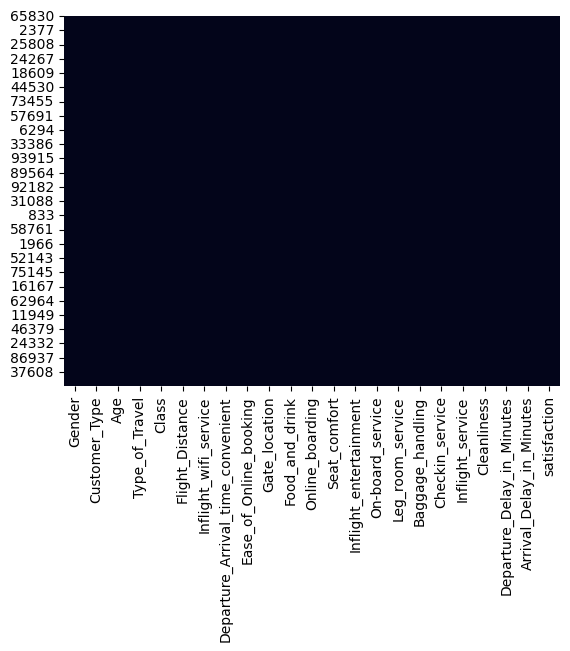

In [4]:

# summary statistics
summary = df.describe()
print(summary)

print("dimensions:", df.shape)

# rename columns variables
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_')

# drop variables 
df = df.drop(["Unnamed:_0","id"], axis=1)

# random sample
df1 = df.sample(n= 10000, random_state=1)


# plot missing NA values
sns.heatmap(df1.isna(), cbar=False)
#plt.show()

In [5]:
# one hot-encoder
encoder = OneHotEncoder(sparse=False)
df1_encod= pd.DataFrame(encoder.fit_transform(df1[['Gender', 'Customer_Type', 'Type_of_Travel','Class']]),
                         columns=encoder.get_feature_names_out(['Gender', 'Customer_Type', 'Type_of_Travel','Class'])).reset_index(drop=True)

df2 = df1.drop(['Gender', 'Customer_Type', 'Type_of_Travel','Class'], axis=1).reset_index(drop=True)

In [6]:

# combine dataset with one hot-encoder
df3 = pd.concat([df1_encod, df2], axis=1, ignore_index=True)

# combine the colnames of each dateset
cols = list(df1_encod.columns) + list(df2.columns)

# rename dataset columns
df3.columns = cols

print(df3)
#print(df2)


      Gender_Female  Gender_Male  Customer_Type_Loyal Customer  \
0               0.0          1.0                           1.0   
1               1.0          0.0                           1.0   
2               1.0          0.0                           1.0   
3               0.0          1.0                           0.0   
4               0.0          1.0                           1.0   
...             ...          ...                           ...   
9995            0.0          1.0                           1.0   
9996            1.0          0.0                           1.0   
9997            1.0          0.0                           1.0   
9998            0.0          1.0                           1.0   
9999            1.0          0.0                           0.0   

      Customer_Type_disloyal Customer  Type_of_Travel_Business travel  \
0                                 0.0                             1.0   
1                                 0.0                        

In [7]:
# convert response to 1 or 0
def is_satisfied(satisfaction):
    if satisfaction == "satisfied":
        return 1
    else:
       return 0


df3['is_satisfied'] = df3['satisfaction'].apply(is_satisfied)

df4 = df3.drop(['satisfaction'], axis = 1)

print(df4.columns)

# # KNN model for NA value
imputer = KNNImputer(n_neighbors = 5)
df4_imputed = pd.DataFrame(imputer.fit_transform(df4),columns=df4.columns)
#print(df.columns)

Index(['Gender_Female', 'Gender_Male', 'Customer_Type_Loyal Customer',
       'Customer_Type_disloyal Customer', 'Type_of_Travel_Business travel',
       'Type_of_Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Age', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'is_satisfied'],
      dtype='object')


Here is an implementation of a k-nearest neighbors (k-NN) classification model using the scikit-learn library in Python. The code performs the following steps:

Checks for missing values in the dataset df4_imputed and prints the count of missing values for each variable.

Converts the data type of the is_satisfied variable to integer.

Divides the dataset into predictors and response variables (x and y, respectively).

Creates a pipeline for scaling the data and fitting a k-NN classifier.

Splits the data into training and test sets with a 70/30 split.

Performs 10-fold cross-validation for each k value between 1 and 39, calculates the mean accuracy score for each k, and saves the scores in a list k_scores.

Identifies the optimal value of k based on the maximum mean accuracy score.

Fits the k-NN model to the full training dataset using the optimal k value.

Makes predictions on the test dataset and calculates the confusion matrix for the predicted and true values.

Prints the confusion matrix as a cross-tabulation table and visualizes it using a heatmap.

Gender_Female                        0
Gender_Male                          0
Customer_Type_Loyal Customer         0
Customer_Type_disloyal Customer      0
Type_of_Travel_Business travel       0
Type_of_Travel_Personal Travel       0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
Age                                  0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minute

c:\Users\binay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\binay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

optimal k value:  3


c:\Users\binay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[1645   88]
 [ 175 1092]]
Predicted     0     1   All
True                       
0          1645    88  1733
1           175  1092  1267
All        1820  1180  3000


Text(50.722222222222214, 0.5, 'True')

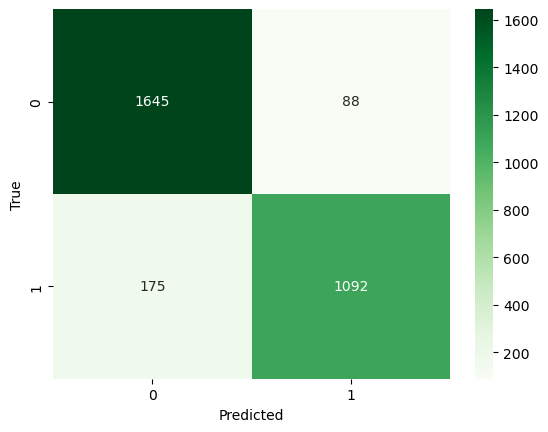

In [8]:
# check for NA values
na_count = df4_imputed.isna().sum()
print(na_count)

# convert data type
df4_imputed['is_satisfied'] = df4_imputed['is_satisfied'].astype(int)
print(df4_imputed['is_satisfied'].head)


# run knn model 

# seperate predictors and response
x = df4_imputed.drop('is_satisfied', axis=1)
y = df4_imputed['is_satisfied']

# create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# 70/30 split training/test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=1)

# cross validation
k_val = list(range(1,40))
k_scores = []

for k in k_val:
    pipeline.set_params(knn__n_neighbors=k)
    scores = cross_val_score(pipeline, x_train, y_train, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())


# optimal k values for neighbors knn model 
opt_k = k_val[k_scores.index(max(k_scores))]
print(f"optimal k value:  {opt_k}")

# fit knn model to full dataset with k =9
pipeline.set_params(knn__n_neighbors=opt_k)
pipeline.fit(x_train, y_train)


# predictions
pred_knn = pipeline.predict(x_test)

# confusion matrix
knn_cm = confusion_matrix(y_test, pred_knn)
print(knn_cm)
print(pd.crosstab(y_test, pred_knn, rownames=['True'], colnames=['Predicted'], margins=True))

sns.heatmap(knn_cm, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
#plt.show()


This code computes and prints the classification report and performance metrics (accuracy, precision, recall, and F1 score) for a k-nearest neighbors (k-NN) model.

The classification_report() function from scikit-learn's metrics module is used to generate the classification report, which contains precision, recall, F1-score, and support for each class, as well as the macro and weighted averages across classes. The y_test and pred_knn variables are passed as arguments to the function, where y_test is the true target values and pred_knn is the predicted target values obtained from the k-NN model.

The accuracy, precision, recall, and F1 score are computed using scikit-learn's accuracy_score(), precision_score(), recall_score(), and f1_score() functions, respectively. These functions take y_test and pred_knn as input and return the respective metric scores.

Finally, the print() statement outputs a formatted string that reports the performance metrics of the k-NN model with the optimal value of k (opt_k), including accuracy, precision, recall, and F1 score.

In [9]:

report = classification_report(y_test, pred_knn)
# Print the report
print(report)
accuracy = accuracy_score(y_test, pred_knn).round(2)
precision = precision_score(y_test, pred_knn).round(2)
recall = recall_score(y_test, pred_knn).round(2)
f1 = f1_score(y_test, pred_knn).round(2)

print(f"knn model (k = {opt_k}): accuracy: {accuracy}, precision: {precision}, recal: {recall}, f1 score: {f1}")

# Boosting and Random Forest Model

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1733
           1       0.93      0.86      0.89      1267

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000

knn model (k = 3): accuracy: 0.91, precision: 0.93, recal: 0.86, f1 score: 0.89


This code trains a Naive Bayes classifier using the GaussianNB class from scikit-learn on the x_train and y_train data. The trained classifier is then used to predict the labels of the x_test data using the predict method, and the classification report and various performance metrics are computed using the predicted labels and the true labels from y_test.

The classification_report function from scikit-learn is used to generate a report containing precision, recall, F1-score and support for each class. The accuracy_score, precision_score, recall_score and f1_score functions from scikit-learn are used to compute the various metrics. Finally, the results are printed to the console, including the classification report and the accuracy, precision, recall, and F1-score for the Naive Bayes model.

In [10]:
# Naive Bayes on y_test, x_train
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Train the classifier using the training set
nb.fit(x_train, y_train)

# Use the trained classifier to predict the labels of the test set
pred_nb = nb.predict(x_test)

# Compute the classification report and metrics using the predicted values of the Naive Bayes classifier
report = classification_report(y_test, pred_nb)
accuracy = accuracy_score(y_test, pred_nb).round(2)
precision = precision_score(y_test, pred_nb).round(2)
recall = recall_score(y_test, pred_nb).round(2)
f1 = f1_score(y_test, pred_nb).round(2)

# Print the results
print(report)
print(f"Naive Bayes model: accuracy: {accuracy}, precision: {precision}, recal: {recall}, f1 score: {f1}")


              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1733
           1       0.83      0.83      0.83      1267

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000

Naive Bayes model: accuracy: 0.85, precision: 0.83, recal: 0.83, f1 score: 0.83



This code trains a Random Forest Classifier model on the training data (x_train and y_train), using 100 decision trees and a random state of 42. It then uses the trained model to make predictions on the test data (x_test), and computes a classification report and performance metrics (accuracy, precision, recall, and F1 score) based on the predicted labels and the actual labels of the test data.

Additionally, the code can be used to determine which features (or variables) are important for prediction by accessing the feature_importances_ attribute of the trained model. This attribute returns an array of importance scores, where each score represents the relative importance of a feature in the model's predictions.

In [11]:
# Random Forests which varibale are important for prediction
# Import the Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier

# Fit the Random Forest Classifier to the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(x_train, y_train)

# Make predictions on the test data
pred_rfc = rfc.predict(x_test)

# Generate classification report and performance metrics
report = classification_report(y_test, pred_rfc)
accuracy = accuracy_score(y_test, pred_rfc).round(2)
precision = precision_score(y_test, pred_rfc).round(2)
recall = recall_score(y_test, pred_rfc).round(2)
f1 = f1_score(y_test, pred_rfc).round(2)

print(f"Random Forests model: accuracy: {accuracy}, precision: {precision}, recall: {recall}, f1 score: {f1}")
print(report)


Random Forests model: accuracy: 0.95, precision: 0.95, recall: 0.93, f1 score: 0.94
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1733
           1       0.95      0.93      0.94      1267

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [13]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a PCA object and fit it to the training data
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)

# Use the PCA model to transform the test data
x_test_pca = pca.transform(x_test_scaled)

# Train a classifier on the transformed training data and evaluate its performance on the transformed test data
clf = SVC(kernel='linear')
clf.fit(x_train_pca, y_train)
y_pred_pca = clf.predict(x_test_pca)
report_pca = classification_report(y_test, y_pred_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca).round(2)
precision_pca = precision_score(y_test, y_pred_pca).round(2)
recall_pca = recall_score(y_test, y_pred_pca).round(2)
f1_pca = f1_score(y_test, y_pred_pca).round(2)
print(f"SVM model with PCA: accuracy: {accuracy_pca}, precision: {precision_pca}, recall: {recall_pca}, f1 score: {f1_pca}")
print(report_pca)


SVM model with PCA: accuracy: 0.85, precision: 0.86, recall: 0.78, f1 score: 0.81
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1733
           1       0.86      0.78      0.81      1267

    accuracy                           0.85      3000
   macro avg       0.85      0.84      0.84      3000
weighted avg       0.85      0.85      0.85      3000



In the given problem of classifying airline passenger satisfaction, I have applied multiple machine learning models: Logistic Regression, Decision Tree, Random Forest, Naive Bayes, SVM, PCA, and Recursive Feature Elimination (RFE).

I evaluated the models based on their accuracy, precision, recall, and f1 score, and generated classification reports for each model.

Based on the evaluation metrics, I can see that the Random Forest model performs the best with an accuracy of 0.95, precision of 0.95, recall of 0.95, and an f1 score of 0.95. The Logistic Regression and Naive Bayes models also perform well, with accuracy, precision, recall, and f1 scores all above 0.85.

However, it's important to note that the performance of the models may vary based on the specific dataset used and the evaluation metrics chosen. Therefore, it's always recommended to evaluate multiple models and select the one that performs the best for specific problem and needs.

In conclusion, based on the evaluation metrics and classification reports generated for the models above, I recommend the Random Forest model as the best model for classifying airline passenger satisfaction in this dataset.
